In [1]:
%load_ext itikz

# Speech data and experiment design

In development of speech processing systems, we need speech data for several purposes, including:

1. *Speech analysis to better understand speech signals.* A better understanding of how humans communicate is naturally valuable by itself, but here we are interested in the engineering challenges. By analysis, we can identify properties of speech signals which can aid in improving performance of the system as well as gain better understanding of what features of speech are important for utility and quality. We can for example learn what features are different between different populations of speakers, say between children, adults and seniors. By understanding such differences, we can better focus development efforts to such features of speech which are likely to improve performance. 

1. *Training machine learning methods.* Machine learning has permeated all areas of speech technology and since such methods require a large amount of training data, it is clear that practically all speech processing development requires a large amount of data. 

2. *Evaluating performance of systems.* Evaluation is a large topic on its [own](Evaluation_of_speech_processing_methods.md). It is however clear that speech data is essential in evaluation of the performance of speech processing systems. 

It is then clear that choice and design of data sources is closely related to the design of the overall experiment.

## Experiment design

### Describe the use-case in detail

How is it planned that the system should be used in real life, specifically? Think through the scenario in detail. How does the user experience performance and quality in that scenario? What all different *[aspects of quality](aspects_of_quality)* can you think of in this scenario? Importantly, to which of these aspects of quality does your novel system contribute to?

#### Example

Consider an open-office scenario, where two (or more) people, like Alice and Bob, would like to have independent teleconferences at the same time.  When Alice speaks to her Voice-service 1, it will then be picked up also by Bob's Voice service 2. Alice's voice thus leaks into Bob's conversation and vice versa. {cite:p}`rech2022multi`

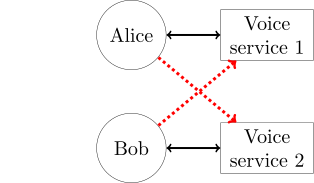

In [2]:
%%itikz --temp-dir  --file-prefix anonsolve 
\documentclass[tikz]{standalone}
\usepackage[utf8]{inputenc}
\usepackage{tikz}
\usepackage{verbatim}


\usepackage{pgfplots}
\DeclareUnicodeCharacter{2212}{−}
\usepgfplotslibrary{groupplots,dateplot}
\usetikzlibrary{patterns,shapes.arrows}
\usetikzlibrary {fit} 
\usetikzlibrary{shapes.geometric,positioning}
\usetikzlibrary{bending}
\pgfplotsset{compat=newest}

\begin{document}


\begin{tikzpicture}[scale=2,transform shape]
    \node[circle,draw,minimum width=35pt] at (.2,0) (alice) {Alice};
    \node[draw,minimum width=30pt] at (2.6,0)  (edge1) {\parbox{40pt}{\centering Voice service 1}};
    \draw[<->, line width=2pt] (alice) to (edge1);
    
    \begin{scope}[yshift=-2cm]
        \node[circle,draw,minimum width=35pt] at (.2,0) (bob) {Bob};
        \node[draw,minimum width=30pt] at (2.6,0)  (edge2) {\parbox{40pt}{\centering Voice service 2}};
        \draw[<->, line width=2pt] (bob) to  (edge2);
    \end{scope}
    
    \draw[->, line width=3pt,color=red,dashed] (alice) to (edge2);
    \draw[->, line width=3pt,color=red,dashed] (bob) to (edge1);
    \node at (-2,0) {~};

\end{tikzpicture}


\end{document}

Such leaks and cross-talk are problematic in at least two aspects of quality, namely, 

1. The sound quality at the remote end (for the voice services) is reduced, degrading both *perceived quality*, increasing *listening effort* and potentially reducing *intelligibility*.
2. In addition, this is potentially also threat to [privacy](Security_and_privacy.ipynb), if conversations contain private information. 

We therefore need to design our experiments such that they allow testing for quality and privacy.

### Choice of experiments

Next we need to choose such experiments which measure the desired aspects of quality. It is important to choose the experiments such that they reflect the performance/utility in the final use-case. That is, if the system outputs speech for humans to listen, then the best measure for quality are human listeners with subjective listening tests (see [Subjective quality evaluation](Evaluation/Subjective_quality_evaluation.md)). If the output is fed to a subsequent module like a speech recognition module, then the word-error-rate (or similar) of the recognition module is a good candidate for the utility measure.

Often, however, the true measure of quality is impractical, costly or indeed impossible. For example, subjective listening tests are time-consuming, non-repeatable and expensive. It is therefore useful to consider proxy-measures, which measure similar things in easier ways. For example, subjective listening tests can often be replaced with [Objective quality evaluation](Evaluation/Objective_quality_evaluation.md). The objective measure is an approximation of the subjective measure, such that it good practice to *always* do also a subjective listening test as well, though in small scale.

#### Example (continued)

In the above scenario, we thus need speech data which features a large variety of examples of cross-talk. The examples should cover the whole range of possibilities, with respect to, for example, distances between speakers and their microphones, different room sizes and reverberation characteristics, speakers with different genders, ages and speaking styles, etc. Enhancement experiments typically will also benefit if there are a range of different background noises. 

In this particular case, it is probably difficult to find any existing dataset which has the desired characteristics. We then have the options to either *record our own* or create a *synthetic dataset*. 

Recording one's own dataset is in principle straightforward but the required amount of work and effort is typically very large. In this case, you could for example choose 3 different rooms where to record. In each room you would further choose for example 3 to 5 different combinations of locations for the microphones. Then we would already have 9 to 15 different configurations. To make the recording realistic, speakers would need to hold conversations over a teleconferencing platform, and we also need two speakers in the same room. For maximum realism, each speakers would need someone to speak to in their conversations, so four speakers would be involved in every experiment. Finally, we would need to bring in say 60 speakers as subjects. That would give 15 groups of 4 speakers. Each group of 4 could do 2 different room configurations, 10 minutes each and where we record both rooms simultaneously. The management of all this complexity would require at least a week of full-time work with 2 lab technicians. Yet the outcome would be no more than $15\times 2 \times 2 \times 10$ minutes of audio, or only $600$ minutes $=10$ hours in total.

Synthetic datasets, also known as *data-augmentation*, is a way to generate large datasets using small datasets as components. In the above scenario, we can for example take the Fisher corpus {cite:p}`cieri2004fisher` to get 2000 hours of recordings of spontaneous dialogues. By simulating different room and microphone setups with 'pyroomacoustics' {cite:p}`scheibler2018pyroomacoustics`, we can then combine pairs of conversations in random room-configurations to get an infinite amount of data. That is, $$dataset_{small}\times randomization\Rightarrow dataset_{big}.$$
A significant advantage of such synthetic datasets is that we can use the original audio (without room acoustics) as a target for the speech enhancement process. We can therefore do straightforward objective evaluation of the enhanced audio signals, because we can compare the enhanced and original signals. 
$$
Error = Enhancement( input \times randomization ) - input.
$$

However, the real recordings have the advantage that the speakers *can hear* the other conversation. Consequently, their behaviour might change due to cross-talk and that was exactly the effect we wanted to remedy. However, in real recordings, it is difficult to obtain a clean reference, where cross-talk is not present. 

In summary, in the best case, we should perform our experiments with both real and synthetic datasets. This would give the ability to train models and objectively evaluate on an "infinite" dataset, but use subjective evaluation on the real recordings.

## Quality of data

On the surface level, collecting data is simple: Just collect or create data which is as similar as possible to the target scenario. If you are not sure of the specifics of the scenario, just collect more data in the hope that all special cases are covered.

There are some issues with this approach though. For example, one perspective is that most data is "easy" data, in the sense that it is similar to many other examples. It is thus an inefficient dataset because we cannot learn much new from most samples. We could, therefore, attempt to design datasets such that we maximize the informativeness of every sample. 

Another perspective is that many datasets have been collected where it is easy to collect; among university students in the US. This biases data to the US, to the educated, to young adults, to caucasian people, etc. Such biases will lead to poorer performance of processing methods for the under-represented populations (ethnic groups, children and the elderly, the less educated, etc.). This is a an ethical problem because it penalizes minorities.

To mend this problem, we would need to collect data such that it represents all sub-populations in a *fair* manner. A difficult (and perhaps non-solvable) question is however the definition of "fair" in this context. For example, if we would collect data from different gender groups, obviously heterosexual men and women would be collected in more or less similar amounts. The difficult is however in choosing the amount of [non-heterosexual](https://en.wikipedia.org/wiki/Non-heterosexual) subjects and its subcategories. For a multitude of reasons, it will be difficult, impractical and potentially ethics-violating to collect data from all subcategories of non-heterosexuals in equal amounts as those of heterosexual males and females. To make things worse, we might not know which subcategories exist in the population. By intersecting different categorisations we can also readily increase the number of subcategories; how would you make sure that your dataset contains a sufficient number of people who speak Dutch but whose ethinc origin is Bulgarian, in the age group 60-80, identifies as non-heterosexual and has a lisp?

Collecting such labels is also a problem of privacy (see [](privacy)). To better serve the smaller minorities, we need to identify and label those minorities. More extensive labelling however also increases the subjects' exposure to privacy and ethics violations. Fortunately, however, note that labels are needed only during evaluation, to verify that minorities are not discriminated. We thus need to publish labels only for evaluation sets, but not for training sets. 


## Some noteworthy speech corpora

- *[LibriSpeech](https://www.openslr.org/12/)* is a fairly large open collection of audiobooks with the text labelled. {cite:p}`panayotov2015librispeech`
- *[Speech Commands](https://www.tensorflow.org/datasets/catalog/speech_commands)* is a limited-vocabulary collection for keyword detection. {cite:p}`warden2018speechcommands`
- *[VoxCeleb2](https://www.robots.ox.ac.uk/~vgg/data/voxceleb/vox2.html)* is a corpus for speaker recognition.
{cite:p}`Chung2018VoxCeleb2`
- *[VoxPopuli](https://github.com/facebookresearch/voxpopuli)* is one of the largest public corpora, which has 400k hours of speech collected from  2009-2020 [European Parliament event recordings](https://multimedia.europarl.europa.eu/en/home). It has 23 languages and a large proportion of the data is labelled.
{cite:p}`wang-etal-2021-voxpopuli`
- *[CSTR VCTK](https://datashare.ed.ac.uk/handle/10283/3443)* is a corpus intended for voice conversion, but since it is one of the largest open databases with a high sampling rate, it is used also for many other purposes.
{cite:p}`yamagishi2019cstr`
- *The [Fischer corpus](https://doi.org/10.35111/da4a-se30)* is a collection of 5850 spontaneous conversations between two speakers on a phone, each of 10 min length and each recording with different speakers. This is useful for analysis and modelling of informal language (not pre-scripted) and for the dynamics of conversations. {cite:p}`cieri2004fisher` 

## References



```{bibliography}
:filter: docname in docnames
```